# Sample size

**Sample size** refers to the number of observations required to conduct an experiment.  
The required sample size varies depending on the **effect size** that the analysis aims to detect.

The following example shows that as the effect size becomes smaller, the number of required observations increases.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

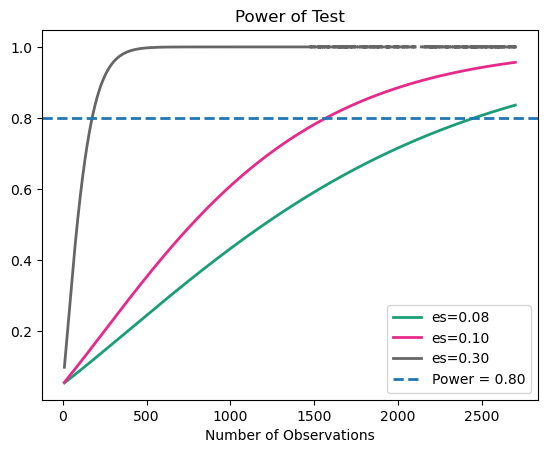

In [14]:
from statsmodels.stats.power import TTestIndPower

# Adjust the parameters for power analysis
sample_sizes = np.array(range(10,2700))
effect_sizes = np.array([0.08, 0.1, 0.3])

# Plot power curves
plt.clf()
fig = TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
ax = fig.axes[0]
ax.axhline(
    y=0.80,
    linestyle='--',
    linewidth=2,
    label='Power = 0.80'
)
plt.legend()
plt.show()

## Minium Detectable Effect (MDE) - Sample size for means
When designing an A/B test, you as a Data Analyst are responsible for checking if a test is feasible in the first place. This entails answering several questions such as: do we have enough traffic? How do we quantify "enough"? What is the minimum difference we can detect given the sample size we have? How long does an experiment need to run? And more.

In the next exercise, you are asked to determine the minimum detectable effect. Specifically, your boss wants to know the required sample size per group to increase the mean order value of checkout page B from 29.87 to 31.

In [19]:
checkout_data = pd.read_csv('../data/checkout.csv')
checkout_data.head(3)

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856


In [32]:
# Calculate and print the baseline mean and standard deviation
mean_B = checkout_data[checkout_data['checkout_page']=='B']['order_value'].mean()
print(f"Mean of checkout page B: {mean_B}")

std_B = checkout_data[checkout_data['checkout_page']=='B']['order_value'].std()
print(f"Standard deviation of checkout page B: {std_B}")

# Define mean_new and calculate the standardized effect size
mean_new = 31

# Calculate Cohen´s d
std_effect_size=(mean_new-mean_B)/std_B
print(f"Effect size {std_effect_size}")

# Calculate the required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=std_effect_size, power=0.8, alpha=0.05, nobs1=None)
print(f"Sample size {sample_size}\n")

print(f"""The required sample size to detect the minimum detectable effect corresponding
to an increase of 1.13 in average order value is approximately 659 observations.""")

Mean of checkout page B: 29.876202331571395
Standard deviation of checkout page B: 7.277644184694833
Effect size 0.15441778134633108
Sample size 659.2892281940125

The required sample size to detect the minimum detectable effect corresponding
to an increase of 1.13 in average order value is approximately 659 observations.


## solve_power method

- effect_size (d): standardized effect size.
- nobs1: observations in group 1.
- ratio: if group 2 has a different size:
- nobs2 = nobs1 * ratio
    + Example: ratio=1 → same size in bouth groups.
- alpha: probability of false positive (type I error).
- power: probability of detecting the effect if exists (1 − beta).
- alternative:
    + 'two-sided':difference in any direction.
    + 'larger': H1: group1 > group2
    + 'smaller': H1: group1 < group2

Based on the previous exercise, we can use the same method and parameters, including the sample size, to compute the *effect size*.

In [35]:
analysis = TTestIndPower()
d = analysis.solve_power(
    effect_size=None,
    nobs1=659,
    alpha=0.05,
    power=0.80,
    ratio=1.0,
    alternative='two-sided'
)

print(d)

0.15445171338754318


## Minium Detectable Effect (MDE) - Sample size for proportions
Real datasets can be messy. As a Data Analyst working with data in the real world, you will encounter situations where the variance in the data is too high to be able to capture a meaningful difference in the metrics. This problem is more likely to happen with continuous metrics such as the average order value in the previous exercise. There are several ways to tackle this, but one of the workarounds is finding a metric that has lower variance but still aligns with the business goals.

Here you will look at calculating the sample size for a binary metric; purchase rate which represents whether a user purchased or not, as opposed to the paid price which may vary more between users.

In [41]:
from statsmodels.stats.proportion import proportion_effectsize

proportion_B = checkout_data.loc[checkout_data['checkout_page']=='B', 'purchased'].mean()
print(f"Purchase rate: {proportion_B}")

proportion_new = 0.86

effect_size_std = proportion_effectsize(proportion_new, proportion_B)
print(f"Effect size (Cohen´s h): {effect_size_std}")

sample_size = TTestIndPower().solve_power(
    effect_size=effect_size_std,
    power=0.8,
    alpha=0.05,
    nobs1=None
)

print(f"The required sample size: {sample_size}")

Purchase rate: 0.847
Effect size (Cohen´s h): 0.036772286717815295
The required sample size: 11609.974337752361
